In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np

In [2]:
ori_df = pd.read_csv('https://raw.githubusercontent.com/Ani-94/Finance_ML/main/HousingData.csv')

In [3]:
df = ori_df.copy()

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
feature_with_nul =[features for features in df.columns if df[features].isnull().sum()>1]

In [7]:
feature_with_nul

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [8]:
df['CRIM'].mean()

3.6118739711934156

In [9]:
df[feature_with_nul] = df[feature_with_nul].fillna(df[feature_with_nul].mean())

In [10]:
feature_with_nul =[features for features in df.columns if df[features].isnull().sum()>1]

In [11]:
feature_with_nul

[]

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [13]:
y = df['MEDV']

In [14]:
numerical_features_nan=[feature for feature in df.columns if df[feature].dtypes!='O' and
                       df[feature].isnull().sum()>=1]

In [15]:
numerical_features_nan

[]

<AxesSubplot:>

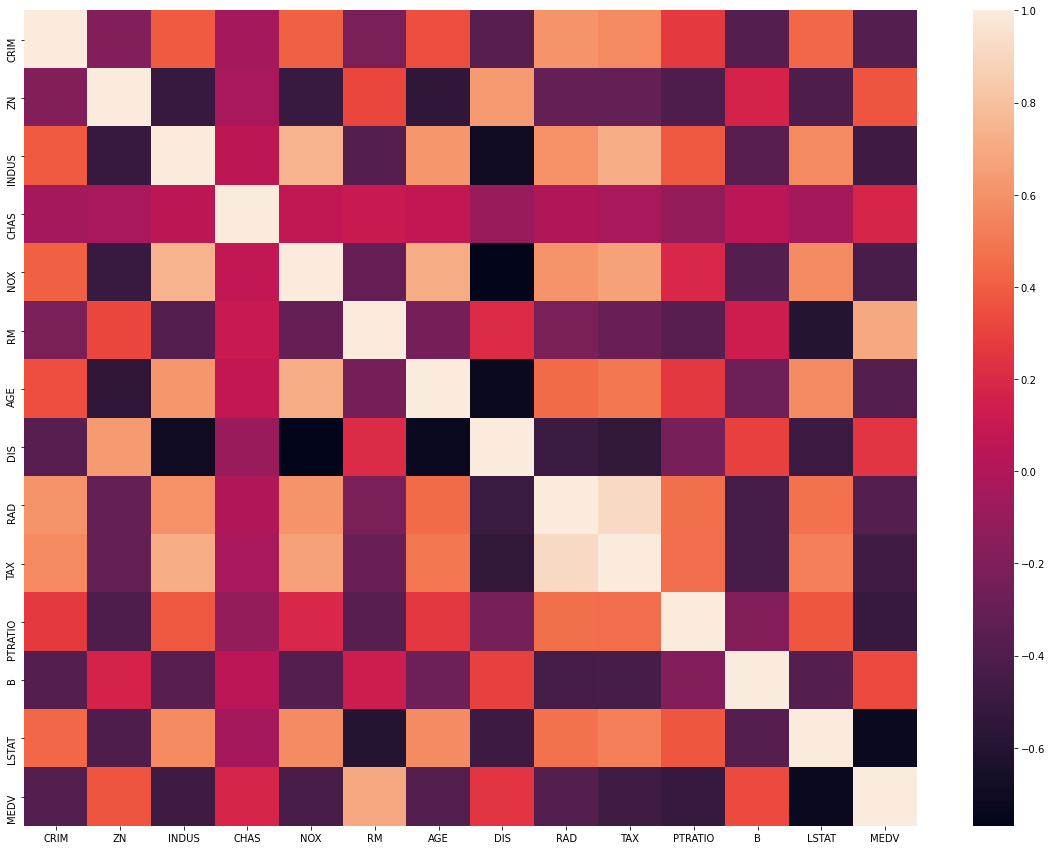

In [16]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr())

<AxesSubplot:>

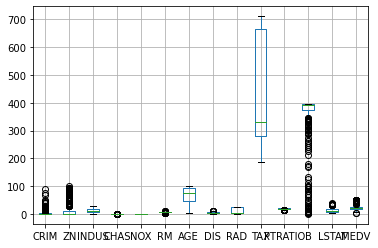

In [17]:
pd.plotting.boxplot(df)

C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

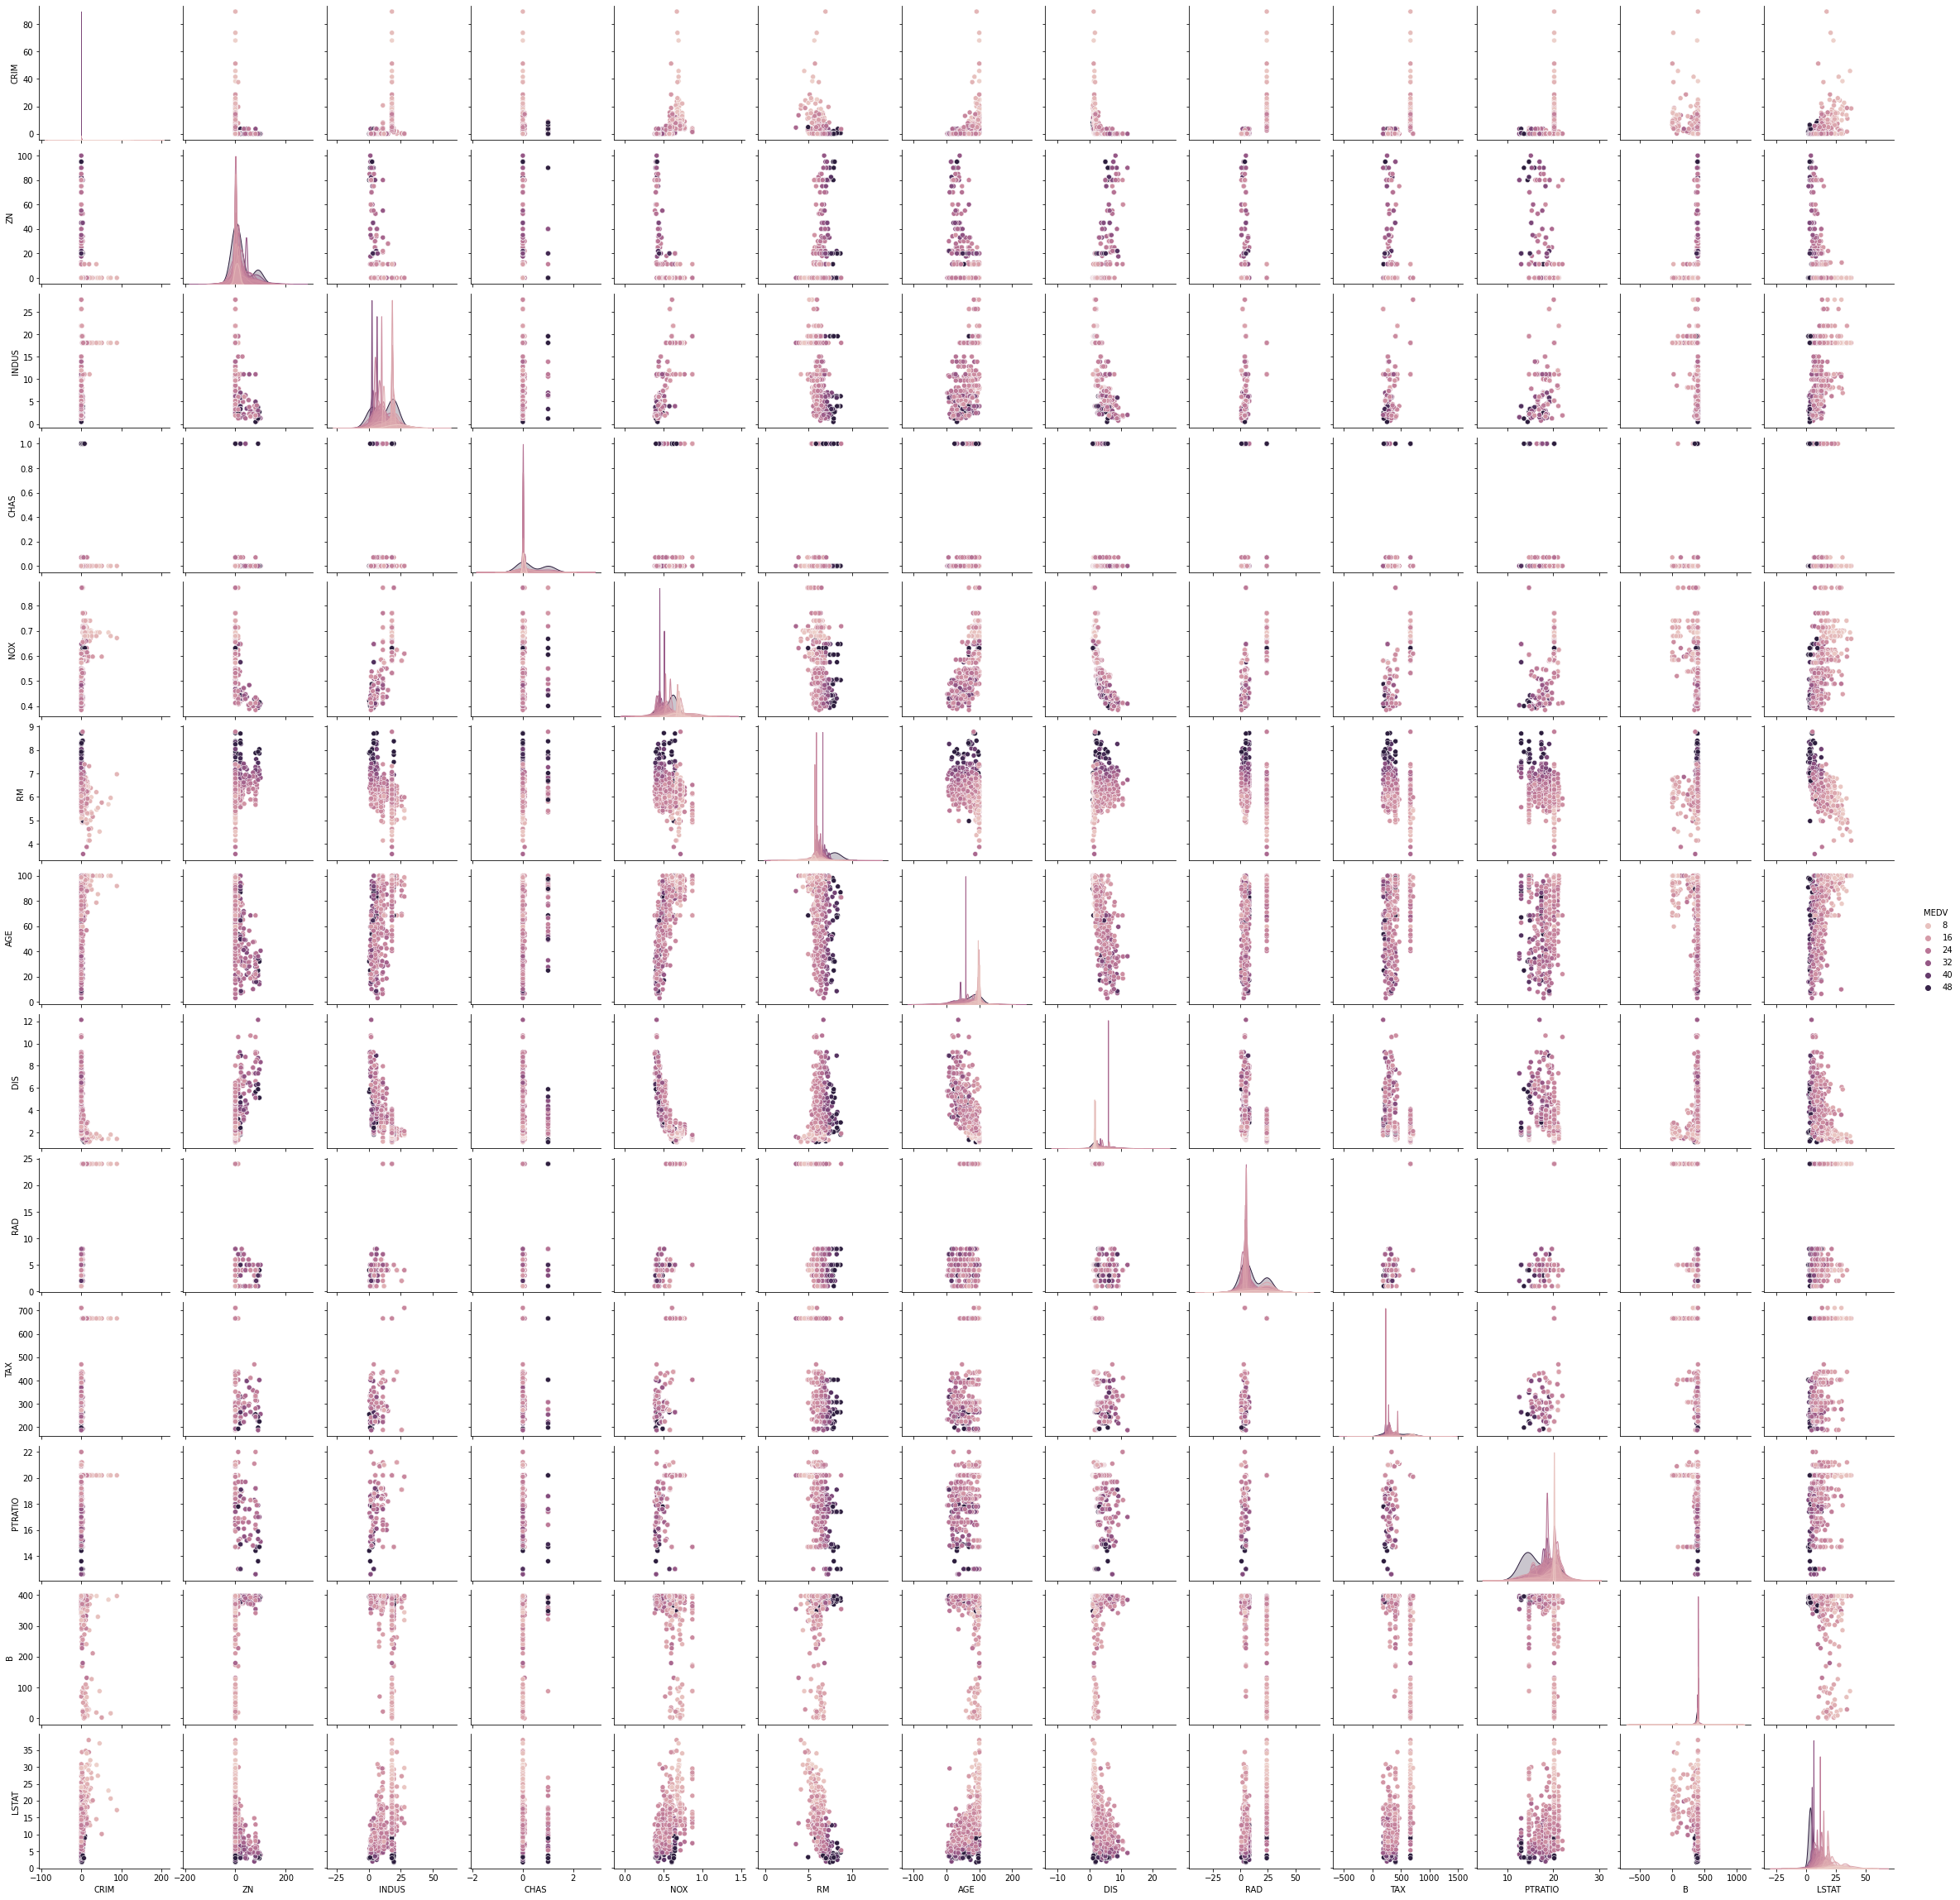

In [18]:
sns.pairplot(df,hue = "MEDV")

In [19]:
fea = [features for features in df.columns if len(df.columns.unique())<=15]

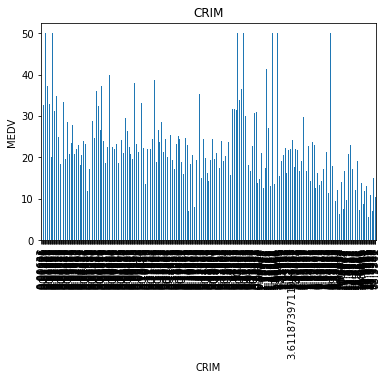

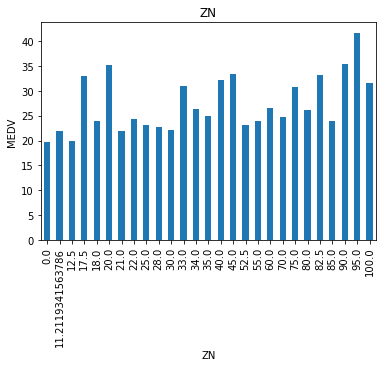

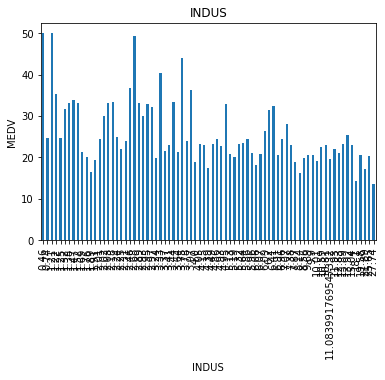

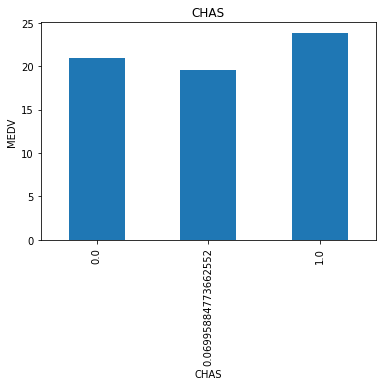

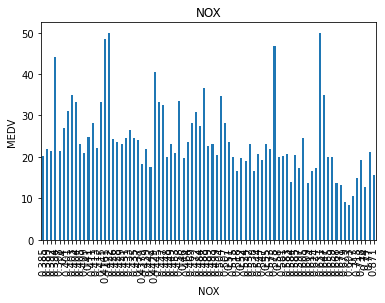

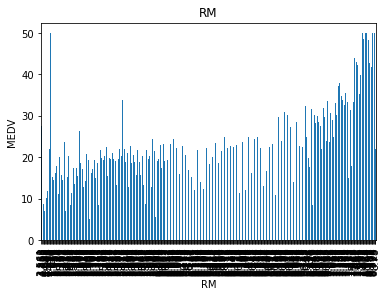

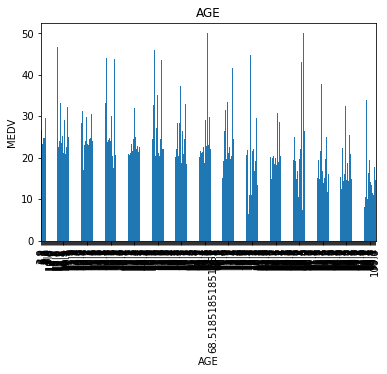

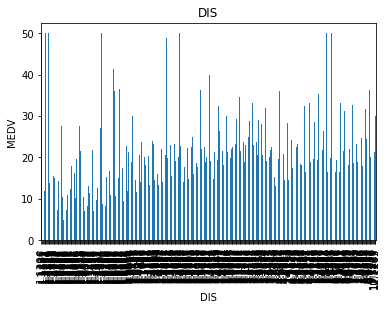

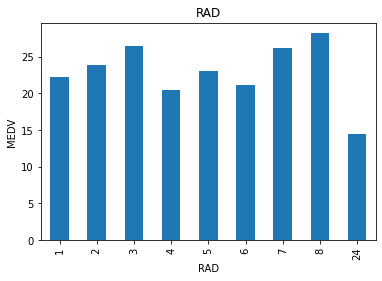

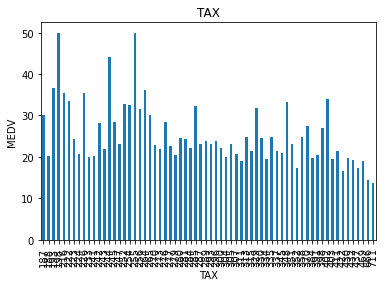

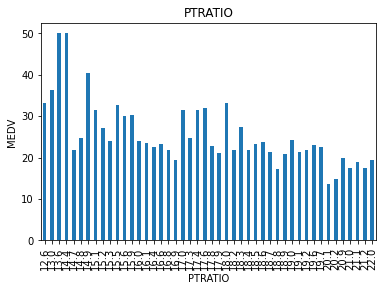

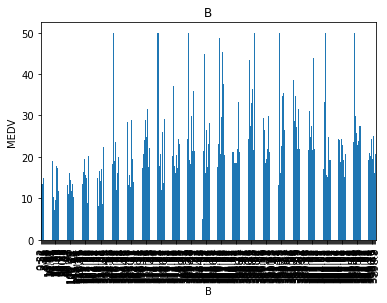

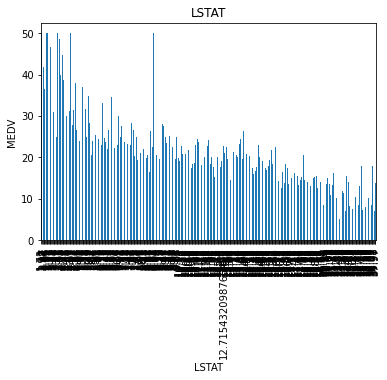

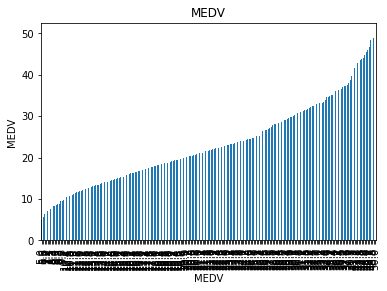

In [20]:
## Lets find the relationship between Discrete and Sales Price
data=df.copy()
for feature in fea:
    data.groupby(feature)['MEDV'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(feature)
    plt.show()
    

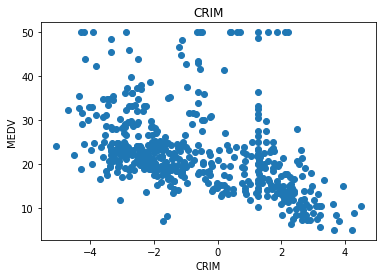

C:\Users\aniru\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


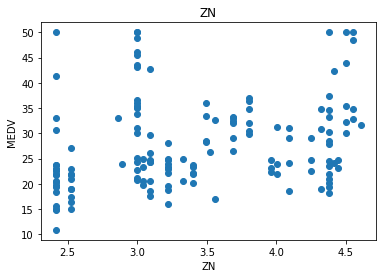

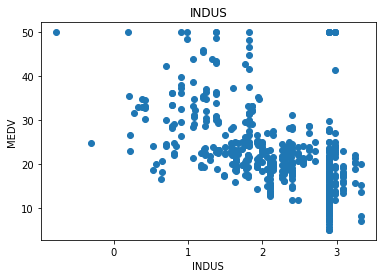

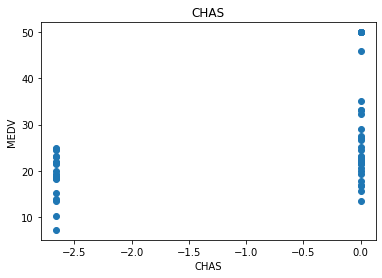

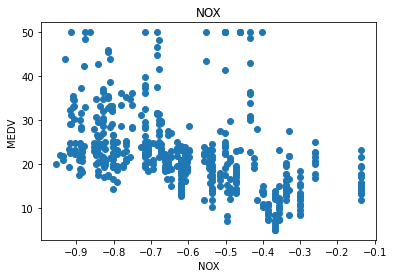

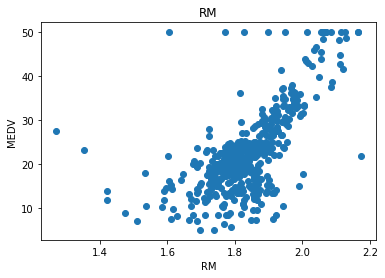

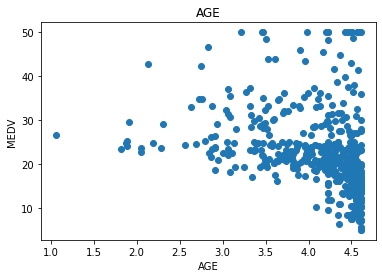

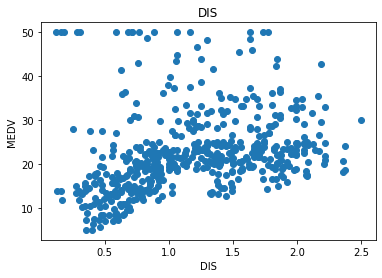

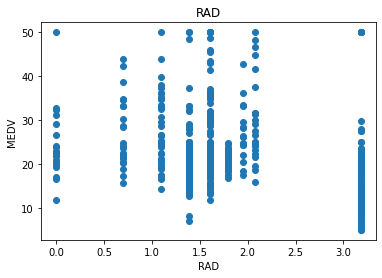

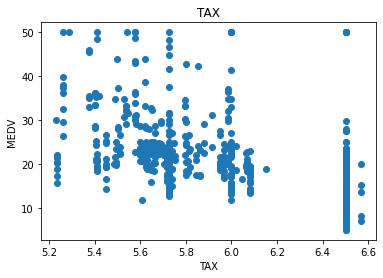

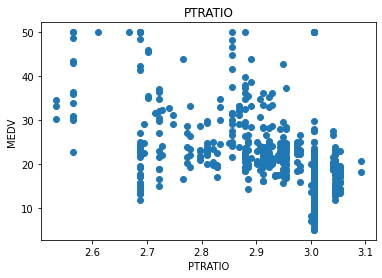

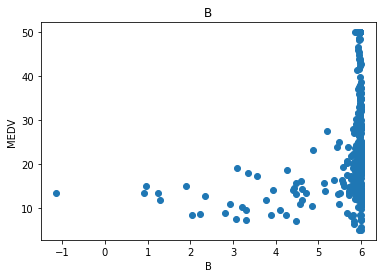

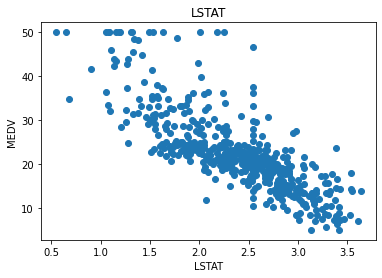

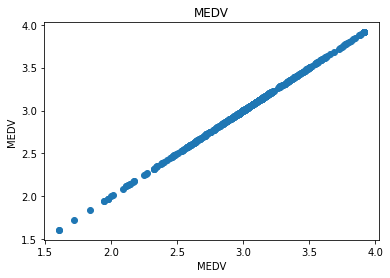

In [21]:
df_f = df.copy()
for feature in df_f.columns:
    df_f[feature] = np.log(df_f[feature])
    plt.scatter(df_f[feature],df_f['MEDV'])
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

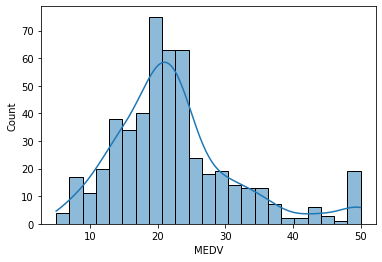

In [22]:
sns.histplot(df['MEDV'],kde=True)

In [23]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [24]:
x = df.loc[:,df.columns!='MEDV']
y= df.loc[:,df.columns=='MEDV']

In [25]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [26]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.82457331696567


In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-30.75951618940068


In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4501.812281942021, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4495.909314266587, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4013.779813013125, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

{'alpha': 0.01}
-36.78333663203743


In [32]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

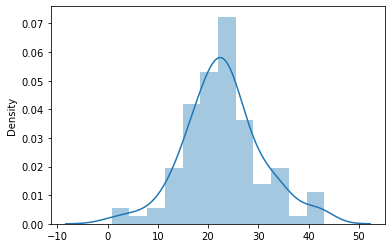

In [33]:
import seaborn as sns

sns.distplot(prediction_lasso)

C:\Users\aniru\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

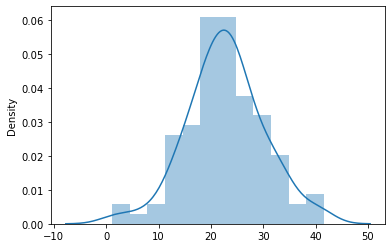

In [34]:
import seaborn as sns

sns.distplot(prediction_ridge)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2l = r2_score(y_test,prediction_lasso)

In [37]:
r2r = r2_score(y_test,prediction_lasso)

In [38]:
r2l

0.7727205941863766

In [39]:
r2r

0.7727205941863766

In [40]:
y_test

,MEDV
222,27.5
307,28.2
42,25.3
10,15.0
134,15.6
...,...
41,26.6
316,17.8
23,14.5
177,24.6


In [41]:
df_ans= y_test.copy()

In [42]:
df_ans['Rasso_predict']=prediction_ridge

In [43]:
df_ans['LAsso_predict'] = prediction_lasso

In [44]:
df_ans['diff_t_pre_r']=y_test-prediction_ridge

In [45]:
df_ans

,MEDV,Rasso_predict,LAsso_predict,diff_t_pre_r
222,27.5,29.421994,32.312325,-1.921994
307,28.2,32.533615,32.599624,-4.333615
42,25.3,26.364744,25.670381,-1.064744
10,15.0,18.663768,19.194194,-3.663768
134,15.6,13.268447,12.926124,2.331553
...,...,...,...,...
41,26.6,28.547568,28.670768,-1.947568
316,17.8,18.134756,18.030915,-0.334756
23,14.5,14.466541,14.114823,0.033459
177,24.6,28.978328,28.700151,-4.378328


In [46]:
df_ans['diff_t_pre_l']=df_ans['MEDV']-prediction_lasso

In [47]:
df_ans

,MEDV,Rasso_predict,LAsso_predict,diff_t_pre_r,diff_t_pre_l
222,27.5,29.421994,32.312325,-1.921994,-4.812325
307,28.2,32.533615,32.599624,-4.333615,-4.399624
42,25.3,26.364744,25.670381,-1.064744,-0.370381
10,15.0,18.663768,19.194194,-3.663768,-4.194194
134,15.6,13.268447,12.926124,2.331553,2.673876
...,...,...,...,...,...
41,26.6,28.547568,28.670768,-1.947568,-2.070768
316,17.8,18.134756,18.030915,-0.334756,-0.230915
23,14.5,14.466541,14.114823,0.033459,0.385177
177,24.6,28.978328,28.700151,-4.378328,-4.100151


In [48]:
df_ans['%err_r']=(df_ans['diff_t_pre_r']/df_ans['MEDV'])*100

In [49]:
df_ans['%err_l']=(df_ans['diff_t_pre_l']/df_ans['MEDV'])*100

In [50]:
df_ans

,MEDV,Rasso_predict,LAsso_predict,diff_t_pre_r,diff_t_pre_l,%err_r,%err_l
222,27.5,29.421994,32.312325,-1.921994,-4.812325,-6.989069,-17.499362
307,28.2,32.533615,32.599624,-4.333615,-4.399624,-15.367428,-15.601504
42,25.3,26.364744,25.670381,-1.064744,-0.370381,-4.208474,-1.463956
10,15.0,18.663768,19.194194,-3.663768,-4.194194,-24.425123,-27.961295
134,15.6,13.268447,12.926124,2.331553,2.673876,14.945853,17.140230
...,...,...,...,...,...,...,...
41,26.6,28.547568,28.670768,-1.947568,-2.070768,-7.321683,-7.784842
316,17.8,18.134756,18.030915,-0.334756,-0.230915,-1.880650,-1.297273
23,14.5,14.466541,14.114823,0.033459,0.385177,0.230755,2.656395
177,24.6,28.978328,28.700151,-4.378328,-4.100151,-17.798079,-16.667281
